In [305]:
library(rstan)
library(dplyr)
library(ggplot2)
library(ggthemes)
library(gridExtra)

In [348]:
bus_times <- c(14, 15, 38, 13, 12, 8, 4, 15, 13, 31, 16)
to_naha<- c(1,1,0,0,1,1,1,0,0,0,0)

## Exponential GLM Using NUTS/RStan

In [409]:
model <- "data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
}
parameters {
  real beta_1;
  real beta_2;
  real<lower=0> sigma;
}
model {
  beta_1 ~ normal(20, 5);
  beta_2 ~ normal(0, 1);
  y ~ normal(beta_1 + beta_2 * x, sigma);
}"

In [410]:
okinawa_dat <- list(
    x=to_naha,
    y=bus_times,
    N=length(bus_times)
)

fit <- stan(model_code=model, data=okinawa_dat)


SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.01 seconds (Warm-up)
Chain 1:                0.007 seconds (Sampling)
Chain 1:                0.017

In [411]:
print(fit)

Inference for Stan model: anon_model.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
beta_1  17.47    0.05 2.79  12.04  15.63  17.42  19.27  23.07  2904    1
beta_2  -0.31    0.02 0.99  -2.23  -0.99  -0.30   0.36   1.60  3697    1
sigma   10.97    0.05 2.88   6.87   8.97  10.50  12.35  17.91  2807    1
lp__   -29.49    0.03 1.24 -32.67 -30.11 -29.18 -28.58 -28.07  1923    1

Samples were drawn using NUTS(diag_e) at Thu Mar 28 14:27:14 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


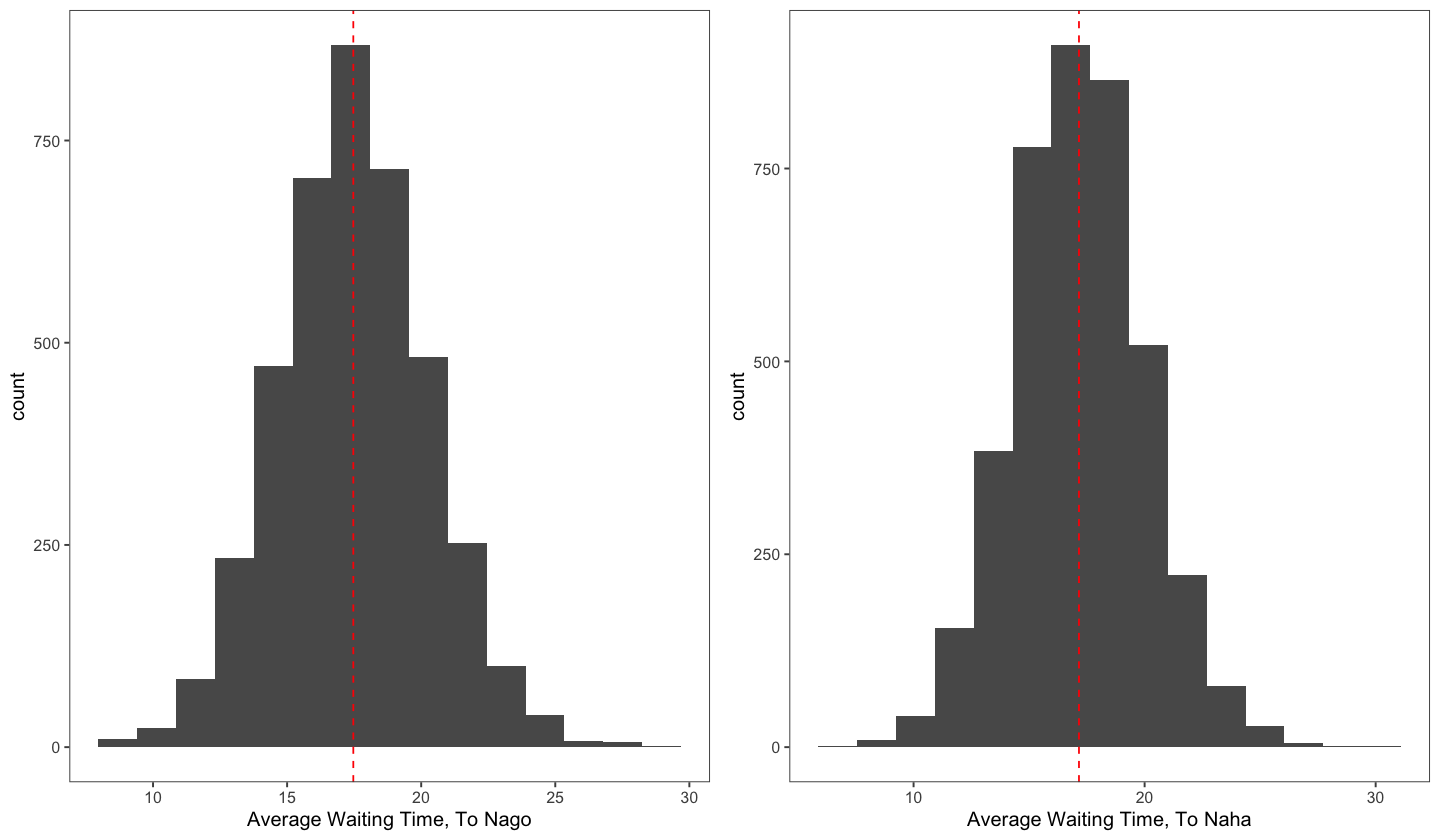

In [412]:
params <- as.data.frame(as.matrix(fit))

p1 <- params %>%
    ggplot(aes(x=beta_1)) +
    geom_histogram(bins=15) +
    geom_vline(xintercept = mean(params$beta_1), color="red", linetype=2)+
    labs(x="Average Waiting Time, To Nago") +
    theme_few()

p2 <- params %>%
    ggplot(aes(x=beta_1+beta_2)) +
    geom_histogram(bins=15) +
    geom_vline(xintercept = mean(params$beta_1 + params$beta_2), color="red", linetype=2)+
    labs(x="Average Waiting Time, To Naha") +
    theme_few()

options(repr.plot.width = 12, repr.plot.height = 7)
grid.arrange(p1, p2, nrow=1)

In [413]:
quantile(params$beta_1, probs=c(0.025, 0.975))
quantile(params$beta_1 + params$beta_2, probs=c(0.025, 0.975))

2.5%    97.5% 
12.03957 23.07076

2.5%    97.5% 
11.71170 22.78997

In [414]:
mean(params$beta_1)
mean(params$beta_1 + params$beta_2)

[1] 17.46851

[1] 17.15837